In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [3]:
mainDir = os.listdir('D:/chest_xray')
#train_normal = 'D:/chest_xray/train/NORMAL'
#train_pneumonia = 'D:/chest_xray/train/PNEUMONIA'

In [4]:
mainDir

['chest_xray', 'test', 'train', 'val', '__MACOSX']

In [5]:
train_folder =  'D:/chest_xray/train/'
test_folder = 'D:/chest_xray/test/'
val_folder = 'D:/chest_xray/val/'

In [6]:
#training vs testing folders

os.listdir(train_folder)
train_norm = train_folder +'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

train_norm, train_p

('D:/chest_xray/train/NORMAL/', 'D:/chest_xray/train/PNEUMONIA/')

train_generator = ImageDataGenerator().flow_from_directory(
    'D:/chest_xray/train/',
    target_size = (500, 500), batch_size=1341)

train_images = next(train_generator)

array_to_img(train_images)

In [7]:
#Data generator improves the image by iterationg through the iamge as your CNN is getting ready to process it 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #image normalization

In [8]:
training_set = train_datagen.flow_from_directory('D:/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                  class_mode = 'binary')


Found 5216 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory('D:/chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
test_set = test_datagen.flow_from_directory('D:/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [11]:
# Instantiate the Sequential class 

cnn = Sequential()

#Create a 2d convolutional layer as part of a CNN. 
#Activation parameter = relu 
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Sample based discretization process. Down sampling an input representation by reducing its dimensionality.
#Helps prevent overfitting by abstraction, creates a new output matrix where each element is a dot product of the previous matrix
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer - transforms 2d matrix into a vector that cen  bed fed into a fully connected nueral network classifier
cnn.add(Flatten())

# Fully Connected Layers - results of the convolutional layer fed through one or more neural layers to generate a prediction
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
# Optimizer controls learning rate throughout training 
# Learning rate determines how fast optimal weights for the models are calculated
#Loss function = lower score = better model
# Accuracy metric generated at the end
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [13]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163, #number of batch iterations before a training epoch is finished. 
                         epochs = 10, #One epoch is when the entire dataset is passed forward and backwards through the neu
                         validation_data = validation_generator,
                         validation_steps = 624) #tal number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

Epoch 1/10
163/163 [==============================] - 294s 2s/step - loss: 0.3510 - accuracy: 0.8507 - val_loss: 0.4543 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 287s 2s/step - loss: 0.2360 - accuracy: 0.8972 - val_loss: 0.3661 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 288s 2s/step - loss: 0.2206 - accuracy: 0.9086 - val_loss: 0.5138 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 294s 2s/step - loss: 0.1943 - accuracy: 0.9266 - val_loss: 0.4781 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 294s 2s/step - loss: 0.1877 - accuracy: 0.9237 - val_loss: 0.3488 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 289s 2s/step - loss: 0.1721 - accuracy: 0.9300 - val_loss: 0.9914 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 288s 2s/step - loss: 0.1888 - accuracy: 0.9218 - val_loss: 0.3059 - val_accuracy: 0.8125

In [14]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [15]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 86.85291409492493 %


In [17]:
import pandas as pd 

p = cnn.predict_generator(test_set)

pre = pd.DataFrame(p)

pre["filename"] = test_set.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)

In [18]:
pre['pre'] = (pre[0]>0.5).apply(int)

pre

,0,filename,label,pre
0,0.998779,NORMAL\IM-0001-0001.jpeg,0,1
1,0.994847,NORMAL\IM-0003-0001.jpeg,0,1
2,0.998270,NORMAL\IM-0005-0001.jpeg,0,1
3,0.054837,NORMAL\IM-0006-0001.jpeg,0,0
4,0.916868,NORMAL\IM-0007-0001.jpeg,0,1
...,...,...,...,...
619,0.581665,PNEUMONIA\person96_bacteria_465.jpeg,1,1
620,0.999983,PNEUMONIA\person96_bacteria_466.jpeg,1,1
621,0.995741,PNEUMONIA\person97_bacteria_468.jpeg,1,1
622,0.998400,PNEUMONIA\person99_bacteria_473.jpeg,1,1


In [20]:
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives 
#and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score

recall_score(pre["label"],pre["pre"]) 

0.7666666666666667

In [21]:
roc_auc_score(pre['label'], pre['pre']) #this is a very low score and suggests further tuning is required

0.5264957264957265

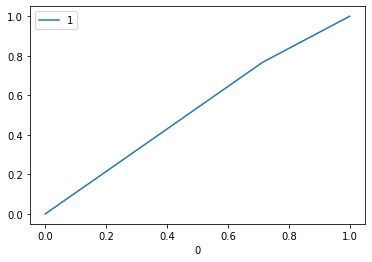

In [22]:
tpr,fpr,thres = roc_curve(pre["label"],pre['pre'])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)

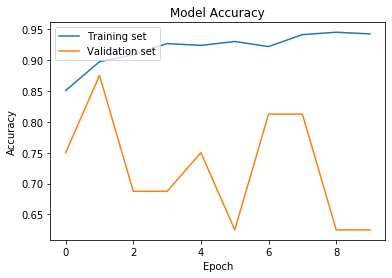

In [24]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

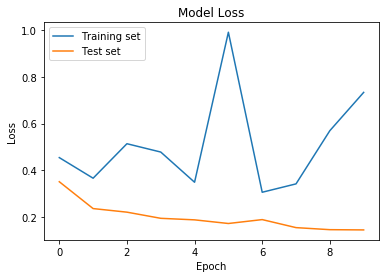

In [25]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [28]:
import tensorflow as tf

from keras.models import load_model

cnn.save('cnn.h5')